pip install psycopg2
pip install psycopg2-binary
pip show psycopg2-binary
print(pd.__version__)

!pip install psycopg2-binary
import psycopg2
from getpass import getpass
import pandas as pd
import psycopg2
import pandas.io.sql as sqlio

# Prompt for the password securely
password = getpass("Enter your database password: ")


connection = psycopg2.connect(
    database="accidents2020", 
    host="localhost", 
    user="postgres",
    password="password",
    port="5432"
)

data = sqlio.read_sql_query("SELECT * FROM accidents_cause", connection)

In [334]:
import psycopg2
import pandas as pd
from IPython.display import display
!pip install pandas sqlalchemy psycopg2
from pandas.io import sql as sqlio
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np


In [335]:

connection = psycopg2.connect(
        dbname="accidents2020",
        user="postgres",
        password="aD31xb9Oeg",
        host="localhost",
        port="5432"
    )



    # Execute SQL query and fetch data into a Pandas DataFrame
data = sqlio.read_sql_query("SELECT * FROM accidents_cause", connection)
data

/Applications/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Year,Month_Number,Month_Name,Day_of_Month,Hour_of_Day,Driver_Cause_Description,Shift_Description,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,datetime
0,2020S001281,Unknown,Unknown,Corts Catalanes,Wednesday,2020,2,February,19,22,Disobeying traffic lights,Night,432561.42,4584522.58,2.193119,41.409423,2020-02-19 22:00:00+01:00
1,2020S002367,Unknown,Unknown,Molins de Rei,Saturday,2020,5,May,30,12,Others,Morning,422891.03,4584730.23,2.077403,41.410423,2020-05-30 12:00:00+02:00
2,2020S005723,Sant Martí,el Camp de l'Arpa del Clot,Independència,Wednesday,2020,12,December,2,13,Others,Morning,431461.53,4584551.41,2.179957,41.409589,2020-12-02 13:00:00+01:00
3,2020S000847,Sant Martí,el Camp de l'Arpa del Clot,Còrsega,Tuesday,2020,2,February,4,6,Lack of attention while driving,Morning,431597.10,4585085.49,2.181518,41.414411,2020-02-04 06:00:00+01:00
4,2020S003120,Sant Martí,el Camp de l'Arpa del Clot,Independència,Monday,2020,7,July,13,14,Disobeying traffic lights,Afternoon,431372.38,4585035.95,2.178835,41.413946,2020-07-13 14:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,2020S000959,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Saturday,2020,2,February,8,6,Improper or careless turn,Morning,431926.84,4586869.18,2.185263,41.430504,2020-02-08 06:00:00+01:00
6252,2020S000242,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Sunday,2020,1,January,12,20,Others,Afternoon,431514.05,4586864.21,2.180323,41.430424,2020-01-12 20:00:00+01:00
6253,2020S001025,Nou Barris,el Turó de la Peira,Cadí,Monday,2020,2,February,10,9,Lack of precaution when reversing,Morning,430607.68,4587157.78,2.169443,41.432991,2020-02-10 09:00:00+01:00
6254,2020S003737,Nou Barris,Porta,Pintor Alsamora,Wednesday,2020,8,August,19,19,Others,Afternoon,431781.49,4587486.66,2.183454,41.436053,2020-08-19 19:00:00+02:00


In [336]:
connection = psycopg2.connect(
dbname="accidents2020",
user="postgres",
password="aD31xb9Oeg",
host="localhost",
port="5432")
    

#data = sqlio.read_sql_query("SELECT * FROM accidents_cause", connection)

    
    



In [337]:
import pandas as pd 

accidents_by_vehicle2020 = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/accidents_by_vehicle2020notduplicated.csv')

accidents_people2020 = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/accidents_people2020notduplicated.csv')

accidents_cause2020 = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/accidents_cause2020notduplicated.csv')


In [338]:
accidents_cause2020.shape

(6256, 17)

In [339]:
accidents_people2020.shape

(6256, 17)

In [340]:
accidents_by_vehicle2020.shape

(6257, 25)

In [341]:
joineddata = sqlio.read_sql_query( 
    """
    SELECT 
        persons."Pedestrian_Cause_Description",
        persons."Involved_Vehicle_Type_Description	",
        persons."Gender_Description",
        persons."Person_Type_Description",
        persons.Age,  
        persons."Pedestrian_Movement_Reason_Description	",
        persons."Driver_Movement_Reason_Description",
        persons."Victimization_Description",
        
        vehicles."Vehicle_Type_Description",
        vehicles."Valid_License_Age",
        vehicles."Vehicle_Model",
        vehicles."Vehicle_Brand",
        vehicles."Vehicle_Color",
        vehicles."License_Description",
        vehicles."Day_of_Week",
          
        
        causes."Driver_Cause_Description",
        causes."Shift_Description",
        causes."Hour_of_Day",
        causes."Month_Number",
        causes."Year",
        causes."Longitud",
        causes."Latitud",
        causes."Case_Number",
        causes."datetime"
        
    FROM 
        "accidents_cause" AS causes  
    INNER JOIN 
        "accident_car" AS vehicles
        ON causes."Case_Number" = vehicles."Case_Number"
    INNER JOIN 
        "accidents_people" AS persons
        ON persons."Case_Number" = causes."Case_Number";
    """, connection)


/Applications/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [342]:
joineddata

,Pedestrian_Cause_Description,Involved_Vehicle_Type_Description\t,Gender_Description,Person_Type_Description,age,Pedestrian_Movement_Reason_Description\t,Driver_Movement_Reason_Description,Victimization_Description,Vehicle_Type_Description,Valid_License_Age,...,Day_of_Week,Driver_Cause_Description,Shift_Description,Hour_of_Day,Month_Number,Year,Longitud,Latitud,Case_Number,datetime
0,Unknown,Car,Female,Driver,29,Unknown,Unknown,Uninjured,Car,4.0,...,Wednesday,Improper or careless turn,Night,0,1,2020,2.168518,41.429055,2020S000001,2020-01-01 00:00:00+01:00
1,Desobeir el senyal del semŕfor,Taxi,Female,Pedestrian,26,Leisure and entertainment,Unknown,Minor injury: Hospitalization up to 24 hours,Taxi,11.0,...,Wednesday,Not respecting pedestrian crossings,Night,2,1,2020,2.141752,41.370833,2020S000002,2020-01-01 02:00:00+01:00
2,Unknown,Motorcycle,Male,Driver,42,Unknown,Leisure and entertainment,Minor injury: Hospitalization up to 24 hours,Motorcycle,24.0,...,Wednesday,Improper or careless turn,Night,2,1,2020,2.144746,41.392351,2020S000003,2020-01-01 02:00:00+01:00
3,Unknown,Car,Female,Passenger,20,Unknown,Unknown,Minor injury: Refused medical assistance,Car,4.0,...,Wednesday,Disobeying traffic lights,Morning,6,1,2020,2.138226,41.392618,2020S000004,2020-01-01 06:00:00+01:00
4,Others,Ciclomotor,Female,Pedestrian,39,Unknown,Unknown,Minor injury: Medical assistance at accident site,Moped,NaN,...,Wednesday,Others,Night,4,1,2020,2.176465,41.391756,2020S000005,2020-01-01 04:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,Unknown,Bicicleta,Male,Driver,21,Unknown,Unknown,Minor injury: Medical assistance at accident site,Car,43.0,...,Thursday,Improper or careless turn,Morning,13,12,2020,2.140979,41.377158,2020S006273,2020-12-31 13:00:00+01:00
6200,Unknown,Car,Male,Driver,46,Unknown,Leisure and entertainment,Others,Car,29.0,...,Thursday,Lack of precaution when reversing,Afternoon,17,12,2020,2.158141,41.426210,2020S006274,2020-12-31 17:00:00+01:00
6201,Unknown,Car,Male,Driver,24,Unknown,Unknown,Uninjured,Moped,16.0,...,Thursday,Improper or careless turn,Afternoon,20,12,2020,2.164303,41.385597,2020S006275,2020-12-31 20:00:00+01:00
6202,Unknown,Motorcycle,Male,Driver,48,Unknown,Other activities,Minor injury: Hospitalization up to 24 hours,Motorcycle,16.0,...,Thursday,Lack of attention while driving,Morning,13,12,2020,2.179123,41.377958,2020S006276,2020-12-31 13:00:00+01:00


In [343]:
joineddata.to_csv('/Users/anastasiasadova/Desktop/files_git/joineddata.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [344]:
joineddata['Victimization_Description'].unique()

array(['Uninjured', 'Minor injury: Hospitalization up to 24 hours',
       'Minor injury: Refused medical assistance',
       'Minor injury: Medical assistance at accident site',
       'Death (within 24 hours of accident)',
       'Serious injury: Hospitalization over 24 hours', 'Others',
       'Death (after 24 hours of accident)'], dtype=object)

In [345]:
joineddata.shape

(6204, 24)

In [346]:
serious_accident = joineddata[joineddata['Victimization_Description'].isin([
    'Death (within 24 hours of accident)',
    'Serious injury: Hospitalization over 24 hours',
    'Death (after 24 hours of accident)'
])]
serious_accident

,Pedestrian_Cause_Description,Involved_Vehicle_Type_Description\t,Gender_Description,Person_Type_Description,age,Pedestrian_Movement_Reason_Description\t,Driver_Movement_Reason_Description,Victimization_Description,Vehicle_Type_Description,Valid_License_Age,...,Day_of_Week,Driver_Cause_Description,Shift_Description,Hour_of_Day,Month_Number,Year,Longitud,Latitud,Case_Number,datetime
9,Unknown,Car,Female,Pedestrian,82,Leisure and entertainment,Unknown,Death (within 24 hours of accident),Car,27.0,...,Wednesday,Not respecting pedestrian crossings,Afternoon,17,1,2020,2.185236,41.436057,2020S000011,2020-01-01 17:00:00+01:00
48,Unknown,Motorcycle,Male,Driver,42,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,NaN,...,Saturday,Disobeying other signals,Night,1,1,2020,2.149964,41.419744,2020S000050,2020-01-04 01:00:00+01:00
58,Unknown,Veh. mobilitat personal amb motor,Female,Driver,43,Unknown,In transit (commuting),Serious injury: Hospitalization over 24 hours,Personal mobility vehicle with motor,NaN,...,Saturday,Disobeying traffic lights,Afternoon,15,1,2020,2.169376,41.391264,2020S000060,2020-01-04 15:00:00+01:00
130,Unknown,Motorcycle,Male,Driver,59,Unknown,In transit (commuting),Serious injury: Hospitalization over 24 hours,Motorcycle,30.0,...,Wednesday,Disobeying traffic lights,Afternoon,15,1,2020,2.178460,41.432123,2020S000132,2020-01-08 15:00:00+01:00
135,Unknown,Motorcycle,Male,Driver,38,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,46.0,...,Wednesday,Not respecting distances,Afternoon,15,1,2020,2.186092,41.403252,2020S000137,2020-01-08 15:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,Desobeir el senyal del semŕfor,Motorcycle,Male,Driver,30,Unknown,In transit (commuting),Serious injury: Hospitalization over 24 hours,Motorcycle,9.0,...,Tuesday,Others,Afternoon,17,12,2020,2.152765,41.384072,2020S005856,2020-12-08 17:00:00+01:00
5811,Desobeir el senyal del semŕfor,Motorcycle,Male,Pedestrian,50,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,5.0,...,Wednesday,Others,Afternoon,17,12,2020,2.181084,41.408742,2020S005876,2020-12-09 17:00:00+01:00
5871,Unknown,Bicicleta,Male,Driver,16,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Car,11.0,...,Saturday,Disobeying traffic lights,Afternoon,18,12,2020,2.177688,41.402767,2020S005936,2020-12-12 18:00:00+01:00
5875,Unknown,Ciclomotor,Male,Driver,32,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,1.0,...,Saturday,Disobeying other signals,Afternoon,21,12,2020,2.163464,41.409683,2020S005941,2020-12-12 21:00:00+01:00


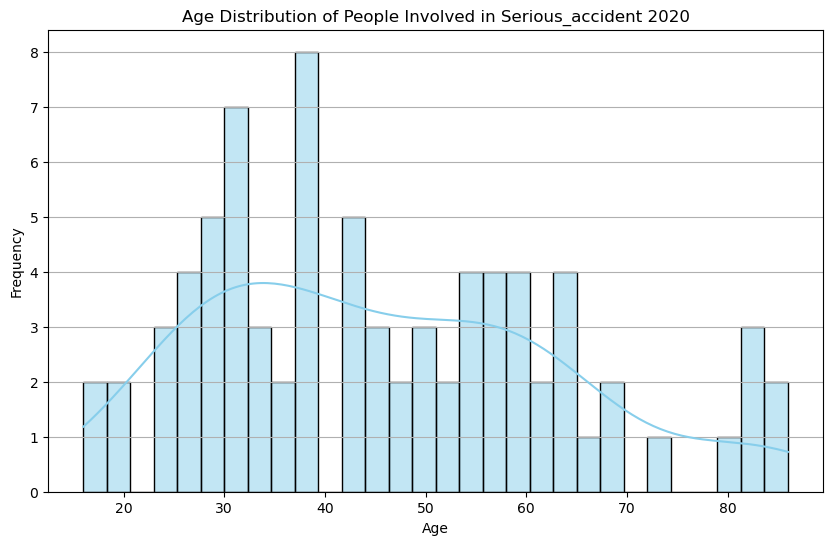

In [347]:
plt.figure(figsize=(10, 6))
sns.histplot(serious_accident['age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title('Age Distribution of People Involved in Serious_accident 2020')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

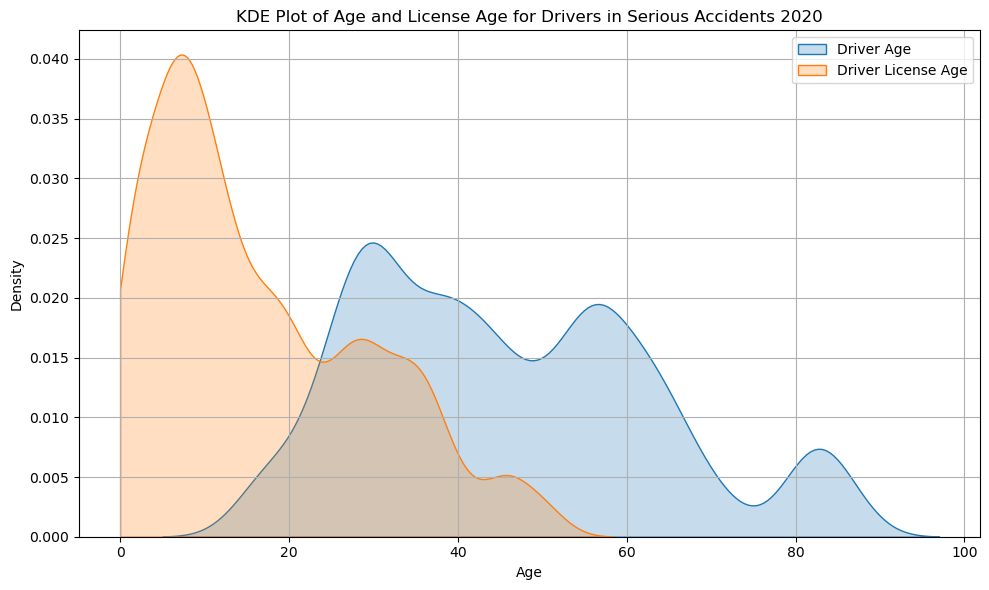

In [348]:
# Plot the distribution of Age and License Age for drivers using KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(serious_accident['age'].dropna(), shade=True, label='Driver Age', bw_adjust=0.5)
sns.kdeplot(serious_accident['Valid_License_Age'].dropna(), shade=True, label='Driver License Age', bw_adjust=0.5, clip=(0, None))
plt.title('KDE Plot of Age and License Age for Drivers in Serious Accidents 2020')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [349]:
driver_data['Valid_License_Age'].unique()

array([nan, 30., 46., 10., 21.,  5.,  7., 25., 33., 50., 20.,  1., 31.,
       11., 12.,  8., 18., 32., 45., 26., 24.,  4.,  6., 38., 35.,  2.,
       36.,  9.])

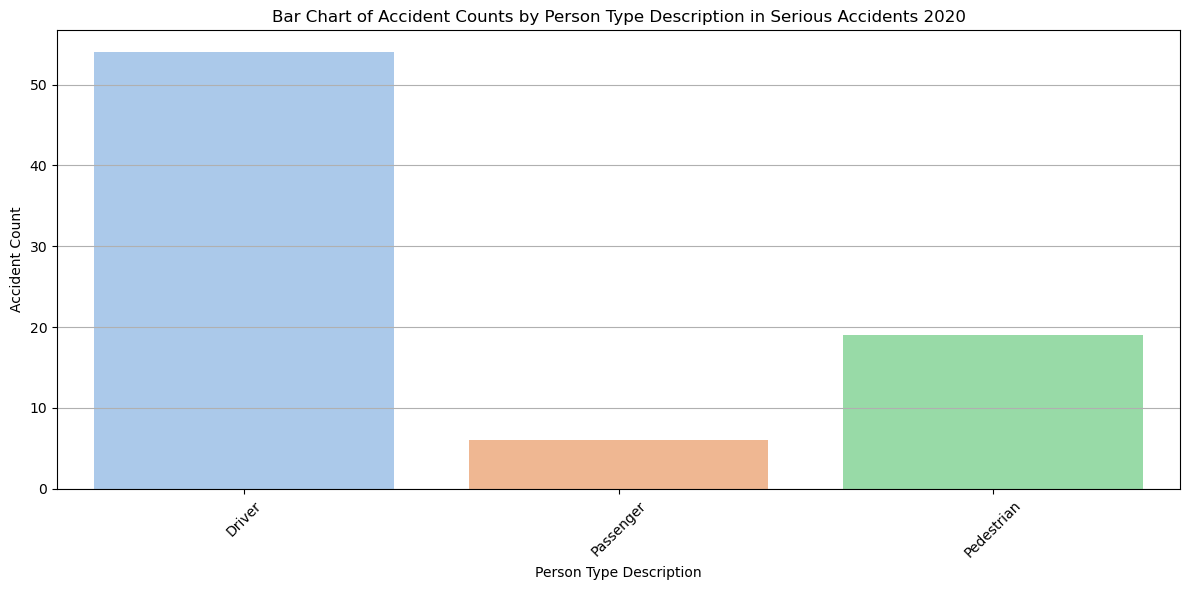

In [350]:
# Count the number of accidents by Person_Type_Description
accident_counts = serious_accident.groupby('Person_Type_Description')['Case_Number'].count().reset_index()
accident_counts.rename(columns={'Case_Number': 'Accident_Count'}, inplace=True)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Person_Type_Description', y='Accident_Count', data=accident_counts, palette="pastel")
plt.title('Bar Chart of Accident Counts by Person Type Description in Serious Accidents 2020')
plt.xlabel('Person Type Description')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [351]:
serious_accident['Involved_Vehicle_Type_Description\t'].value_counts()


Motorcycle                           49
Autobús                               6
Car                                   5
Veh. mobilitat personal amb motor     5
Bicicleta                             5
Ciclomotor                            3
Altres vehicles amb motor             1
Taxi                                  1
Camió rígid > 3,5 tones               1
Furgoneta                             1
Autobús articulat                     1
Maquinŕria d'obres i serveis          1
Name: Involved_Vehicle_Type_Description\t, dtype: int64

In [352]:
# Define the translation dictionary
translation_dict = {
    "Motorcycle": "Motorcycle",
    "Autobús": "Bus",
    "Car": "Car",
    "Veh. mobilitat personal amb motor": "Personal Mobility Vehicle with Motor",
    "Bicicleta": "Bicycle",
    "Ciclomotor": "Moped",
    "Altres vehicles amb motor": "Other Motor Vehicles",
    "Taxi": "Taxi",
    "Camió rígid > 3,5 tones": "Rigid Truck > 3.5 Tons",
    "Furgoneta": "Van",
    "Autobús articulat": "Articulated Bus",
    "Maquinŕria d'obres i serveis": "Construction and Service Machinery"
}

# Translate the column
serious_accident['Involved_Vehicle_Type_Description\t'] = serious_accident['Involved_Vehicle_Type_Description\t'].map(translation_dict)

# Display the translated values
print(serious_accident['Involved_Vehicle_Type_Description\t'].value_counts())


Motorcycle                              49
Bus                                      6
Car                                      5
Personal Mobility Vehicle with Motor     5
Bicycle                                  5
Moped                                    3
Other Motor Vehicles                     1
Taxi                                     1
Rigid Truck > 3.5 Tons                   1
Van                                      1
Articulated Bus                          1
Construction and Service Machinery       1
Name: Involved_Vehicle_Type_Description\t, dtype: int64


/var/folders/7p/zttb20215d97cqdshpnkph4r0000gn/T/ipykernel_1290/4247470726.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serious_accident['Involved_Vehicle_Type_Description\t'] = serious_accident['Involved_Vehicle_Type_Description\t'].map(translation_dict)


In [353]:
serious_accident['Pedestrian_Cause_Description'].value_counts()


Unknown                            66
Desobeir el senyal del semŕfor      8
Creuar per fora pas de vianants     5
Name: Pedestrian_Cause_Description, dtype: int64

In [354]:
serious_accident.shape

(79, 24)

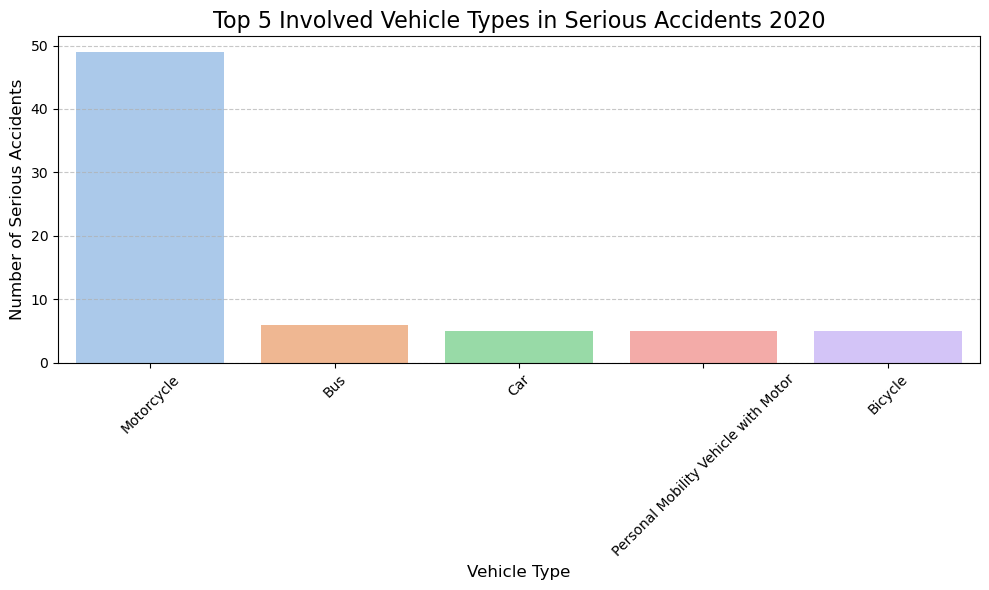

In [355]:
# Get the top 5 most common vehicle types in serious accidents
top_vehicles = serious_accident['Involved_Vehicle_Type_Description\t'].value_counts().head(5)

# Plot the top 5 vehicle types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_vehicles.index, y=top_vehicles.values, palette="pastel")
plt.title('Top 5 Involved Vehicle Types in Serious Accidents 2020', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Number of Serious Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [356]:
# Define a translation dictionary
translation_dict = {
    "Unknown": "Not a Pedestrian Fault",
    "Desobeir el senyal del semŕfor": "Disobey the traffic light signal",
    "Creuar per fora pas de vianants": "Crossing outside the pedestrian crossing"
}

# Apply the translation to the column
serious_accident['Pedestrian_Cause_Description'] = serious_accident['Pedestrian_Cause_Description'].map(translation_dict)

# Check the translated column
print(serious_accident['Pedestrian_Cause_Description'].value_counts())

Not a Pedestrian Fault                      66
Disobey the traffic light signal             8
Crossing outside the pedestrian crossing     5
Name: Pedestrian_Cause_Description, dtype: int64


/var/folders/7p/zttb20215d97cqdshpnkph4r0000gn/T/ipykernel_1290/1086742126.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serious_accident['Pedestrian_Cause_Description'] = serious_accident['Pedestrian_Cause_Description'].map(translation_dict)


In [357]:
import folium
barcelona_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Add each accident as a marker with reason of the accident
for _, row in serious_accident.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"Reason: {row['Driver_Cause_Description']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(barcelona_map)

# Show the map
barcelona_map

In [358]:
serious_accident.columns

Index(['Pedestrian_Cause_Description', 'Involved_Vehicle_Type_Description\t',
       'Gender_Description', 'Person_Type_Description', 'age',
       'Pedestrian_Movement_Reason_Description\t',
       'Driver_Movement_Reason_Description', 'Victimization_Description',
       'Vehicle_Type_Description', 'Valid_License_Age', 'Vehicle_Model',
       'Vehicle_Brand', 'Vehicle_Color', 'License_Description', 'Day_of_Week',
       'Driver_Cause_Description', 'Shift_Description', 'Hour_of_Day',
       'Month_Number', 'Year', 'Longitud', 'Latitud', 'Case_Number',
       'datetime'],
      dtype='object')

In [359]:
'Vehicle_Type_Description' 'Vehicle_Model' 'Vehicle_Brand' 'Driver_Cause_Description'

'Vehicle_Type_DescriptionVehicle_ModelVehicle_BrandDriver_Cause_Description'

In [360]:
driver_cause_counts = serious_accident['Driver_Cause_Description'].value_counts().head(10)


driver_cause_counts

Others                                 21
Lack of attention while driving        18
Disobeying traffic lights              13
Improper or careless turn               6
Disobeying other signals                4
Not respecting distances                4
Changing lanes without caution          4
Not respecting pedestrian crossings     3
Lack of precaution entering traffic     3
Improper/defective overtaking           2
Name: Driver_Cause_Description, dtype: int64

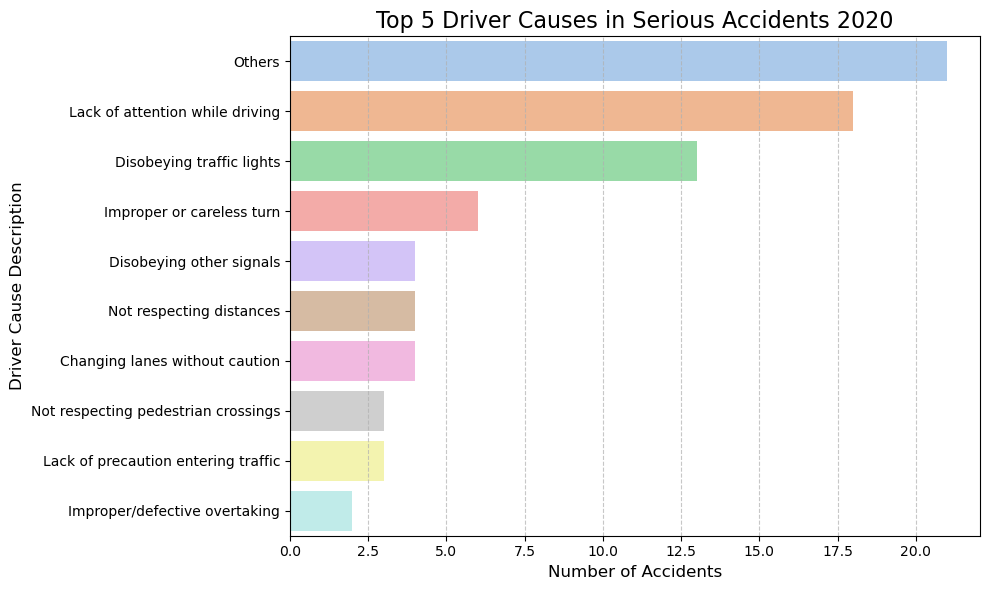

In [361]:
# Plot the top 5 driver causes in serious accidents
plt.figure(figsize=(10, 6))
sns.barplot(
    x=driver_cause_counts.values,
    y=driver_cause_counts.index,
    palette="pastel"
)
plt.title('Top 5 Driver Causes in Serious Accidents 2020', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Driver Cause Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [362]:
vehicle_type_counts = serious_accident['Vehicle_Type_Description'].value_counts().head(5)
vehicle_model_counts = serious_accident['Vehicle_Model'].value_counts().head(5)
vehicle_brand_counts = serious_accident['Vehicle_Brand'].value_counts().head(5)

In [363]:

vehicle_type_counts

Motorcycle    39
Car           16
Bus            7
Van            4
Bicycle        3
Name: Vehicle_Type_Description, dtype: int64

In [364]:
vehicle_brand_counts

HONDA       11
KYMCO        6
KAWASAKI     4
PIAGGIO      4
FORD         4
Name: Vehicle_Brand, dtype: int64

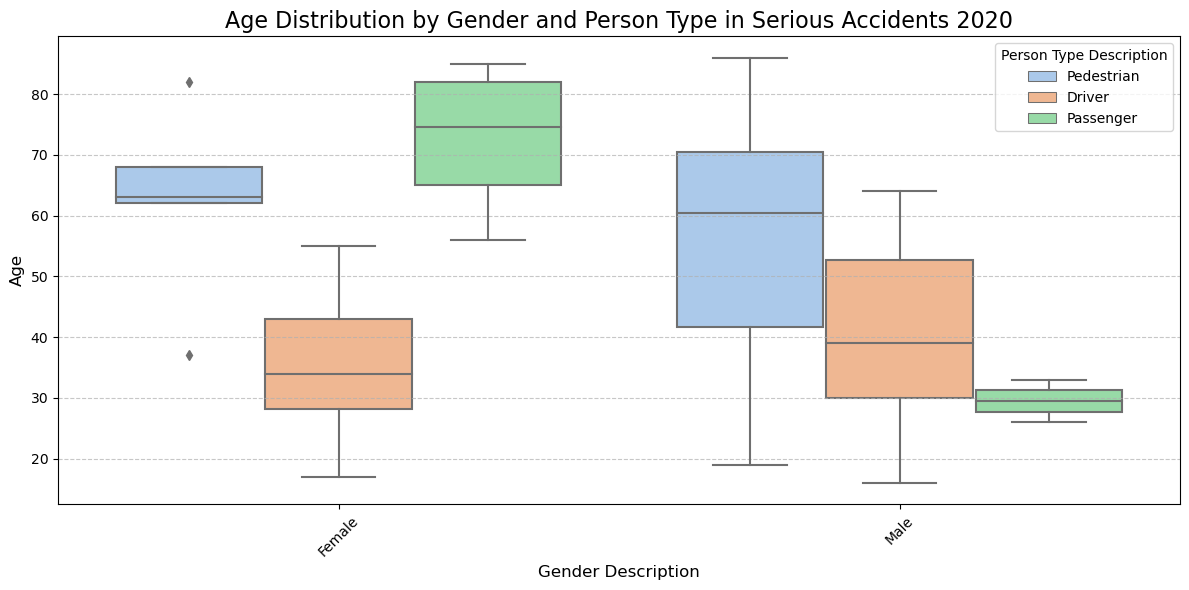

In [365]:
# Plot Age distribution by Gender and Person Type
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Gender_Description',
    y='age',
    hue='Person_Type_Description',
    data=serious_accident,
    palette='pastel'
)

# Customize the plot
plt.title('Age Distribution by Gender and Person Type in Serious Accidents 2020', fontsize=16)
plt.xlabel('Gender Description', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Person Type Description', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


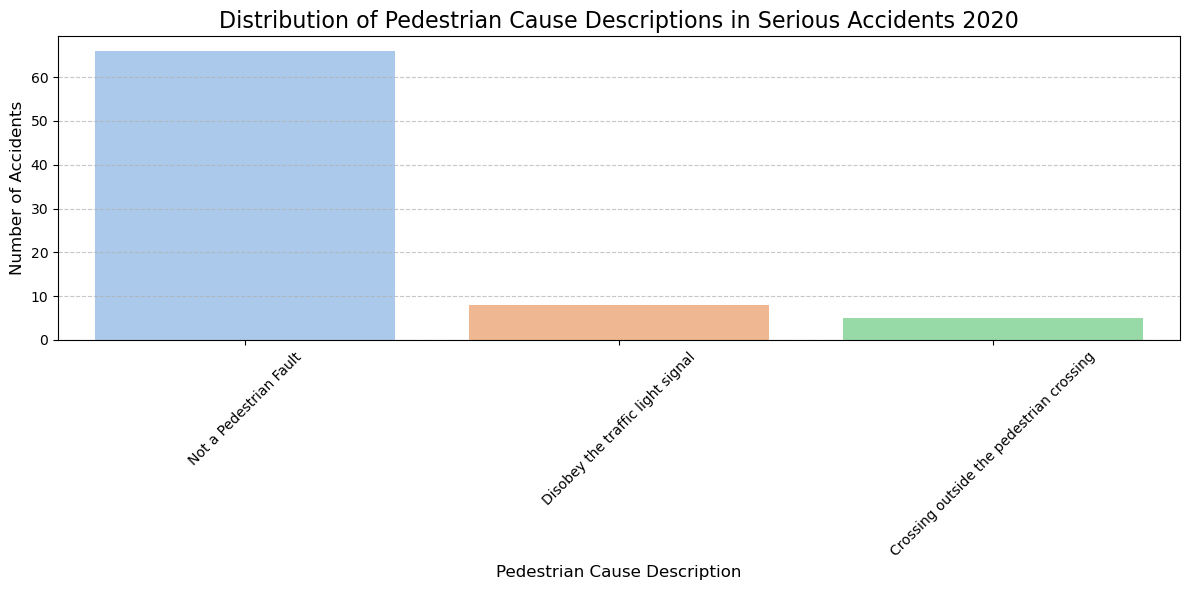

In [366]:
# Replace "unknown" with "not a pedestrian fault"
serious_accident['Pedestrian_Cause_Description'] 

# Get value counts
pedestrian_cause_counts = serious_accident['Pedestrian_Cause_Description'].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=pedestrian_cause_counts.index, y=pedestrian_cause_counts.values, palette='pastel')

# Add labels and title
plt.title('Distribution of Pedestrian Cause Descriptions in Serious Accidents 2020', fontsize=16)
plt.xlabel('Pedestrian Cause Description', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [332]:
serious_accident.columns

Index(['Pedestrian_Cause_Description', 'Involved_Vehicle_Type_Description\t',
       'Gender_Description', 'Person_Type_Description', 'age',
       'Pedestrian_Movement_Reason_Description\t',
       'Driver_Movement_Reason_Description', 'Victimization_Description',
       'Vehicle_Type_Description', 'Valid_License_Age', 'Vehicle_Model',
       'Vehicle_Brand', 'Vehicle_Color', 'License_Description', 'Day_of_Week',
       'Driver_Cause_Description', 'Shift_Description', 'Hour_of_Day',
       'Month_Number', 'Year', 'Longitud', 'Latitud', 'Case_Number',
       'datetime'],
      dtype='object')

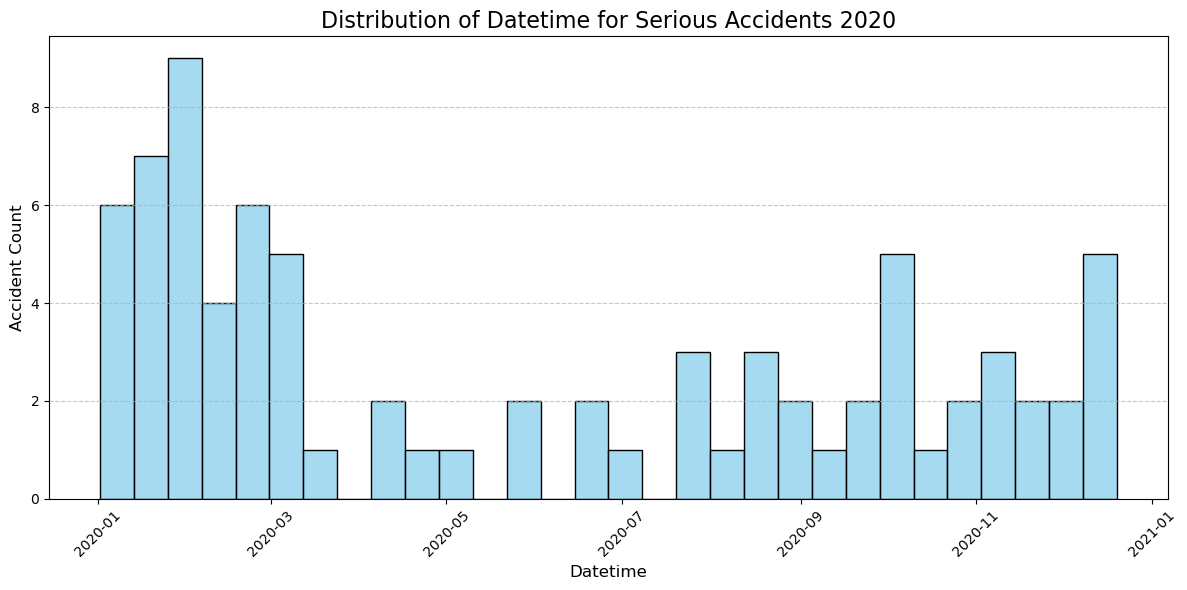

In [257]:
plt.figure(figsize=(12, 6))
sns.histplot(serious_accident['datetime'], kde=False, bins=30, color="skyblue")
plt.title('Distribution of Datetime for Serious Accidents 2020', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [258]:
serious_accident 

,Pedestrian_Cause_Description,Involved_Vehicle_Type_Description\t,Gender_Description,Person_Type_Description,age,Pedestrian_Movement_Reason_Description\t,Driver_Movement_Reason_Description,Victimization_Description,Vehicle_Type_Description,Valid_License_Age,...,Day_of_Week,Driver_Cause_Description,Shift_Description,Hour_of_Day,Month_Number,Year,Longitud,Latitud,Case_Number,datetime
9,Unknown,Car,Female,Pedestrian,82,Leisure and entertainment,Unknown,Death (within 24 hours of accident),Car,27.0,...,Wednesday,Not respecting pedestrian crossings,Afternoon,17,1,2020,2.185236,41.436057,2020S000011,2020-01-01 17:00:00+01:00
48,Unknown,Motorcycle,Male,Driver,42,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,NaN,...,Saturday,Disobeying other signals,Night,1,1,2020,2.149964,41.419744,2020S000050,2020-01-04 01:00:00+01:00
58,Unknown,Veh. mobilitat personal amb motor,Female,Driver,43,Unknown,In transit (commuting),Serious injury: Hospitalization over 24 hours,Personal mobility vehicle with motor,NaN,...,Saturday,Disobeying traffic lights,Afternoon,15,1,2020,2.169376,41.391264,2020S000060,2020-01-04 15:00:00+01:00
130,Unknown,Motorcycle,Male,Driver,59,Unknown,In transit (commuting),Serious injury: Hospitalization over 24 hours,Motorcycle,30.0,...,Wednesday,Disobeying traffic lights,Afternoon,15,1,2020,2.178460,41.432123,2020S000132,2020-01-08 15:00:00+01:00
135,Unknown,Motorcycle,Male,Driver,38,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,46.0,...,Wednesday,Not respecting distances,Afternoon,15,1,2020,2.186092,41.403252,2020S000137,2020-01-08 15:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,Disobey the traffic light signal,Motorcycle,Male,Driver,30,Unknown,In transit (commuting),Serious injury: Hospitalization over 24 hours,Motorcycle,9.0,...,Tuesday,Others,Afternoon,17,12,2020,2.152765,41.384072,2020S005856,2020-12-08 17:00:00+01:00
5811,Disobey the traffic light signal,Motorcycle,Male,Pedestrian,50,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,5.0,...,Wednesday,Others,Afternoon,17,12,2020,2.181084,41.408742,2020S005876,2020-12-09 17:00:00+01:00
5871,Unknown,Bicicleta,Male,Driver,16,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Car,11.0,...,Saturday,Disobeying traffic lights,Afternoon,18,12,2020,2.177688,41.402767,2020S005936,2020-12-12 18:00:00+01:00
5875,Unknown,Ciclomotor,Male,Driver,32,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,1.0,...,Saturday,Disobeying other signals,Afternoon,21,12,2020,2.163464,41.409683,2020S005941,2020-12-12 21:00:00+01:00


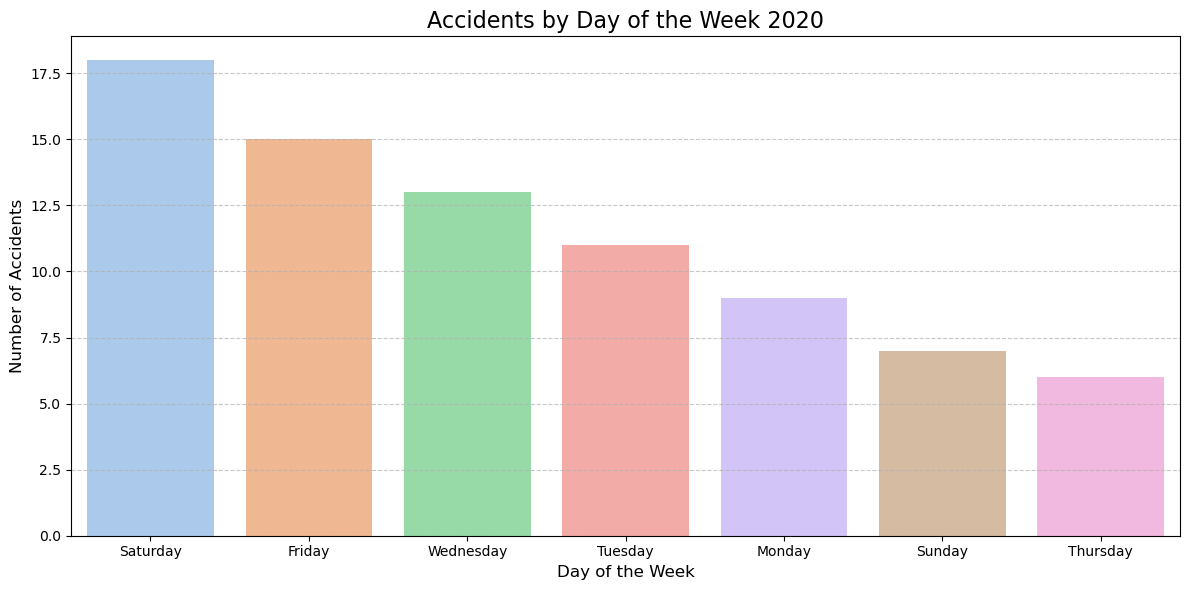

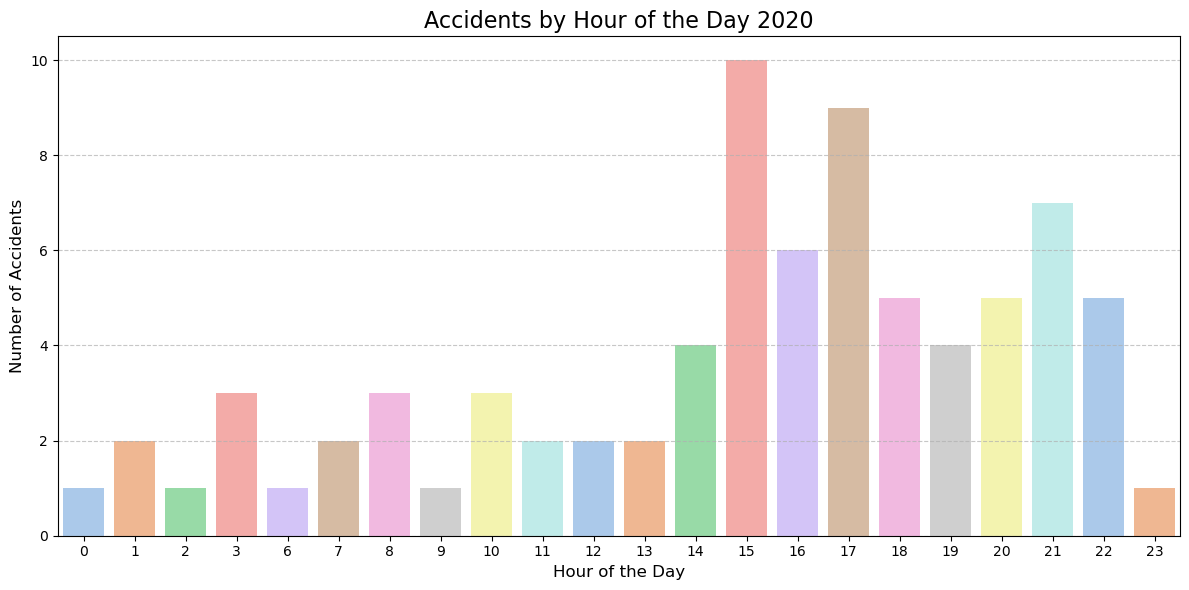

In [259]:
# Count accidents by Day of Week
day_of_week_counts = serious_accident['Day_of_Week'].value_counts()

# Count accidents by Hour of Day
hour_of_day_counts = serious_accident['Hour_of_Day'].value_counts()

# Plot Day of Week
plt.figure(figsize=(12, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette="pastel")
plt.title('Accidents by Day of the Week 2020', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Hour of Day
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_of_day_counts.index, y=hour_of_day_counts.values, palette="pastel")
plt.title('Accidents by Hour of the Day 2020', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [316]:
abuelos = joineddata[(joineddata['age'] >= 80) & (joineddata['Person_Type_Description'] == 'Driver')]

In [279]:
abuelos['Vehicle_Brand'].value_counts()

SEAT            3
PEUGEOT         2
SUZUKI          2
CITROEN         2
FORD            2
HONDA           2
AUDI            2
MERCEDES        2
RENAULT         2
DACIA           1
NISSAN          1
DAELIM          1
PIAGGIO         1
Unknown         1
VOLKSWAGEN      1
TOYOTA          1
OPEL            1
XIAOMI          1
HYUNDAI         1
IMF             1
ES DESCONEIX    1
KYMCO           1
Name: Vehicle_Brand, dtype: int64

In [281]:
abuelos['Vehicle_Model'].value_counts()

UH 200                    2
TWEET 125                 1
A 180                     1
ATECA                     1
MILER 125                 1
                          1
E-PTIO                    1
I 20                      1
208 5P SIGNATURE PURET    1
NC4 HDI                   1
M-365                     1
ASTRA                     1
AUDI A1                   1
AVENSIS                   1
C3                        1
NSC110MPD                 1
POLO                      1
VESPA LX 125              1
FIESTA                    1
Altea                     1
E 220                     1
XQ125                     1
SH125AD                   1
A3 1.8 5V                 1
600-L                     1
LOGAN                     1
ECO-T.100                 1
Unknown                   1
CLIO                      1
TWINGO                    1
FOCUS                     1
Name: Vehicle_Model, dtype: int64

In [273]:
abuelos['Driver_Cause_Description'].value_counts()

Lack of attention while driving        7
Others                                 6
Changing lanes without caution         5
Disobeying other signals               4
Lack of precaution entering traffic    4
Not respecting pedestrian crossings    2
Disobeying traffic lights              2
Not yielding to the right              1
Improper or careless turn              1
Name: Driver_Cause_Description, dtype: int64

In [275]:
abuelos['Gender_Description'].value_counts()

Male      28
Female     4
Name: Gender_Description, dtype: int64

In [ ]:
black honda drivers

who are people over 85 on the road?




In [283]:
abuelos['Victimization_Description'].value_counts()

Uninjured                                            23
Minor injury: Hospitalization up to 24 hours          6
Others                                                1
Minor injury: Refused medical assistance              1
Minor injury: Medical assistance at accident site     1
Name: Victimization_Description, dtype: int64

In [285]:
abuelos['Hour_of_Day'].value_counts()

14    5
13    4
20    4
17    3
11    3
18    3
16    2
8     2
19    2
15    1
7     1
10    1
12    1
Name: Hour_of_Day, dtype: int64

In [287]:
joineddata.dtypes

Pedestrian_Cause_Description                 object
Involved_Vehicle_Type_Description\t          object
Gender_Description                           object
Person_Type_Description                      object
age                                           int64
Pedestrian_Movement_Reason_Description\t     object
Driver_Movement_Reason_Description           object
Victimization_Description                    object
Vehicle_Type_Description                     object
Valid_License_Age                           float64
Vehicle_Model                                object
Vehicle_Brand                                object
Vehicle_Color                                object
License_Description                          object
Day_of_Week                                  object
Driver_Cause_Description                     object
Shift_Description                            object
Hour_of_Day                                   int64
Month_Number                                  int64
Year        

In [288]:

filtered_drivers = joineddata[
    (joineddata['Vehicle_Brand'].str.lower() == 'honda') & 
    (joineddata['Vehicle_Color'].str.lower() == 'black')
]

# Display the filtered DataFrame
filtered_drivers


,Pedestrian_Cause_Description,Involved_Vehicle_Type_Description\t,Gender_Description,Person_Type_Description,age,Pedestrian_Movement_Reason_Description\t,Driver_Movement_Reason_Description,Victimization_Description,Vehicle_Type_Description,Valid_License_Age,...,Day_of_Week,Driver_Cause_Description,Shift_Description,Hour_of_Day,Month_Number,Year,Longitud,Latitud,Case_Number,datetime
87,Unknown,Motorcycle,Male,Passenger,33,Unknown,Unknown,Minor injury: Hospitalization up to 24 hours,Motorcycle,14.0,...,Monday,Lack of attention while driving,Afternoon,21,1,2020,2.176465,41.391756,2020S000089,2020-01-06 21:00:00+01:00
134,Unknown,Veh. mobilitat personal amb motor,Male,Driver,28,Unknown,Leisure and entertainment,Uninjured,Motorcycle,28.0,...,Wednesday,Disobeying other signals,Afternoon,19,1,2020,2.199462,41.403384,2020S000136,2020-01-08 19:00:00+01:00
201,Unknown,Motorcycle,Female,Driver,47,Unknown,Unknown,Minor injury: Refused medical assistance,Motorcycle,27.0,...,Friday,Others,Afternoon,18,1,2020,2.174272,41.401940,2020S000204,2020-01-10 18:00:00+01:00
204,Unknown,Motorcycle,Male,Driver,25,Unknown,Leisure and entertainment,Minor injury: Hospitalization up to 24 hours,Motorcycle,3.0,...,Friday,Improper or careless turn,Afternoon,19,1,2020,2.136465,41.399624,2020S000207,2020-01-10 19:00:00+01:00
246,Unknown,Motorcycle,Female,Driver,41,Unknown,In transit (commuting),Minor injury: Hospitalization up to 24 hours,Motorcycle,15.0,...,Monday,Changing lanes without caution,Morning,8,1,2020,2.172847,41.388955,2020S000249,2020-01-13 08:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,Unknown,Motorcycle,Female,Passenger,37,Unknown,Unknown,Minor injury: Medical assistance at accident site,Motorcycle,1.0,...,Friday,Others,Morning,11,12,2020,2.125354,41.378631,2020S005909,2020-12-11 11:00:00+01:00
5850,Unknown,Car,Male,Driver,57,Unknown,Other activities,Uninjured,Motorcycle,1.0,...,Thursday,Disobeying traffic lights,Afternoon,21,12,2020,2.167593,41.413999,2020S005915,2020-12-10 21:00:00+01:00
5894,Unknown,Motorcycle,Female,Driver,60,Unknown,On a mission,Minor injury: Hospitalization up to 24 hours,Motorcycle,42.0,...,Monday,Lack of attention while driving,Morning,9,12,2020,2.162183,41.398535,2020S005961,2020-12-14 09:00:00+01:00
6123,Unknown,Veh. mobilitat personal amb motor,Male,Driver,17,Unknown,Leisure and entertainment,Minor injury: Medical assistance at accident site,Motorcycle,4.0,...,Thursday,Disobeying traffic lights,Afternoon,19,12,2020,2.182235,41.404519,2020S006195,2020-12-24 19:00:00+01:00


In [289]:
victimization_types = [
    'Death (within 24 hours of accident)',
    'Serious injury: Hospitalization over 24 hours',
    'Death (after 24 hours of accident)'
]

In [297]:
lookingforhonda = filtered_drivers[filtered_drivers['Victimization_Description'].isin(victimization_types)]
lookingforhonda

,Pedestrian_Cause_Description,Involved_Vehicle_Type_Description\t,Gender_Description,Person_Type_Description,age,Pedestrian_Movement_Reason_Description\t,Driver_Movement_Reason_Description,Victimization_Description,Vehicle_Type_Description,Valid_License_Age,...,Day_of_Week,Driver_Cause_Description,Shift_Description,Hour_of_Day,Month_Number,Year,Longitud,Latitud,Case_Number,datetime
603,Unknown,Motorcycle,Female,Driver,43,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,25.0,...,Monday,Improper or careless turn,Morning,8,1,2020,2.132596,41.370060,2020S000613,2020-01-27 08:00:00+01:00
1291,Creuar per fora pas de vianants,Motorcycle,Male,Pedestrian,82,On a mission,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,15.0,...,Thursday,Lack of attention while driving,Afternoon,18,2,2020,2.185411,41.385663,2020S001306,2020-02-20 18:00:00+01:00
3978,Unknown,Bicicleta,Male,Driver,50,Unknown,Unknown,Serious injury: Hospitalization over 24 hours,Motorcycle,12.0,...,Saturday,Lack of attention while driving,Afternoon,14,9,2020,2.162646,41.441771,2020S004022,2020-09-05 14:00:00+02:00


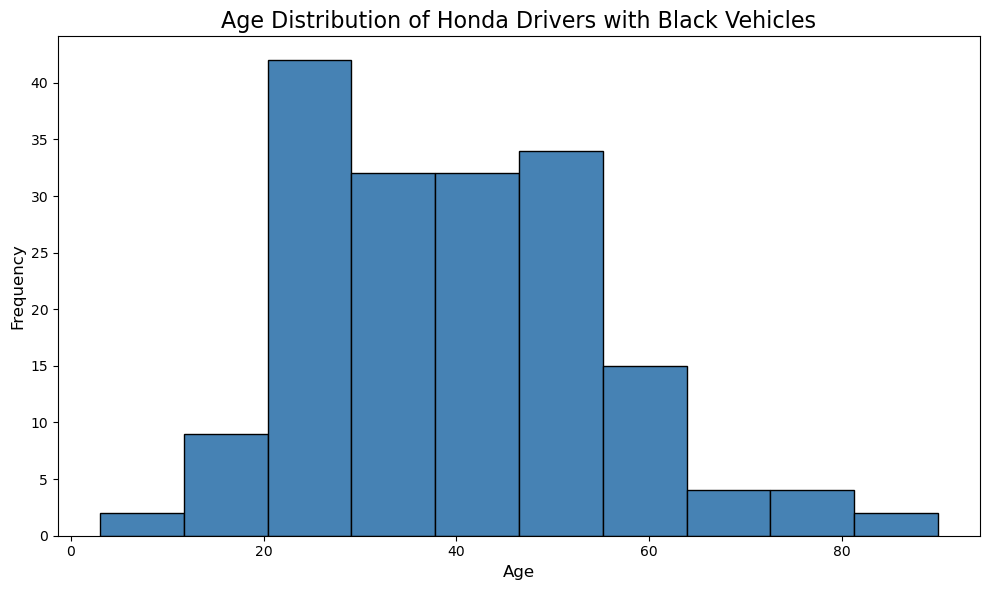

In [367]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_drivers['age'], bins=10, color='steelblue', edgecolor='black')

# Add labels and title
plt.title('Age Distribution of Honda Drivers with Black Vehicles', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
